In [1]:
import numpy as np
import matplotlib.pyplot as plt
import Utilitis_HybridCode as utils
from matplotlib.colors import LogNorm
from matplotlib.patches import ConnectionPatch

# 1. Standard code

## 1. 1 $N_\mathrm{el}=256$, $p=1$, $N_\mathrm{p}=1\cdot10^5$

In [2]:
data = np.loadtxt('data_wpe=2_wpar=0.1_wperp_0.1_nuh=0.002_L=80_Nel=256_T=300_dt=0.05_p=1_Np=1e5_CVoff.txt')


# ... get parameters
pa = data[0]
T = pa[18]
dt = pa[19]
Nz = int(pa[17])
Lz = pa[16]

c = 1
wce = -1
wpe = 2
p = 1

s = 6
dz = Lz/Nz
zj = np.linspace(0, Lz, Nz + 1)
# ...


# ... get data
uj = data[1:, 0:s*Nz]
bx = uj[:, 2::s]
# ...


# ... compute Bx on a space-time-grid and create w and k vectors
Nt = int(T/dt)
w = np.linspace(0, Nt, Nt + 1) - Nt/2
w = 2*np.pi/T*w

ks = np.linspace(0, Nz, Nz + 1) - Nz/2
ks = 2*np.pi/Lz*ks

Bx = np.zeros((Nt + 1, Nz + 1))
bsp, N, quad_points, weights = utils.createBasis(Lz, Nz, p)

for i in range(0, Nt + 1):
    if i%1000 == 0:
        print(i)
    Bx[i] = utils.evaluation(bx[i], bsp, zj, zj)
# ...

0
1000
2000
3000
4000
5000
6000


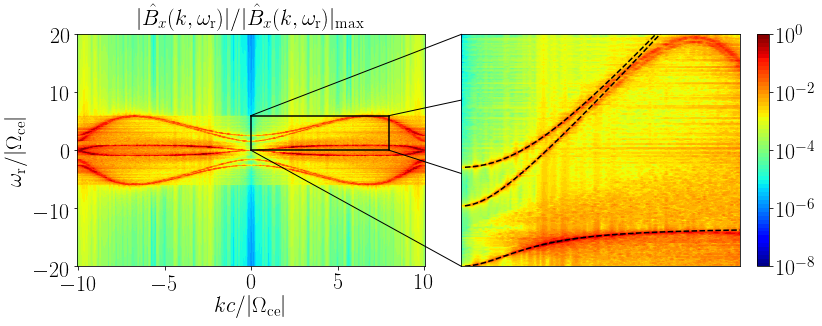

In [5]:
fontsize = 22
plt.rc('text', usetex = True)
plt.rc('font', family = 'serif')
plt.rcParams.update({'font.size': fontsize})
plt.rc('xtick', labelsize = fontsize)
plt.rc('ytick', labelsize = fontsize)


#... compute 2d FFT of Bx
Bxkw = np.fft.fft2(Bx)
K, W = np.meshgrid(ks, w)
Bkw = np.fft.fftshift(Bxkw)
Bkw_plot = np.abs(Bkw)
# ...


f1 = plt.figure()
f1.set_figheight(5)
f1.set_figwidth(12)

ax1 = plt.subplot(121)


ticks = np.power(10, np.linspace(-8, 0, 5))
lvls = np.logspace(-8, 0, 60)
plt.contourf(K, W, Bkw_plot/Bkw_plot.max(), cmap = 'jet', norm = LogNorm(), levels = lvls)
plt.plot(np.linspace(0, 8, 10), np.zeros(10), 'k')
plt.plot(np.linspace(0, 8, 10), np.ones(10)*6, 'k')
plt.plot(np.zeros(10), np.linspace(0, 6, 10), 'k')
plt.plot(np.ones(10)*8, np.linspace(0, 6, 10), 'k')
#plt.xlim((0, 6))
plt.ylim((-20, 20))
plt.xlabel(r'$kc/ |\Omega_\mathrm{ce}|$')
plt.ylabel(r'$\omega_\mathrm{r}/ |\Omega_\mathrm{ce}|$')
#plt.colorbar(ticks = ticks)
plt.title(r'$|\hat{B}_x(k,\omega_\mathrm{r})|/|\hat{B}_x(k,\omega_\mathrm{r})|_\mathrm{max}$', fontsize = fontsize)
#plt.savefig('/home/florian/Schreibtisch/Masterarbeit/05_Präsentationen/03_Ringberg/result1.png', bbox_inches = 'tight')

ax2 = plt.subplot(122)




# ... analytical dispersion relation
k1 = np.linspace(0.1, 8.0, 40)

w1_1 = np.zeros(40)
w1_2 = np.zeros(40)
w1_3 = np.zeros(40)

w1_1[0] = 0.0001 
w1_2[0] = 1.5001 
w1_3[0] = 2.5001


for i in range(0, 40):
    
    if i == 0:
        w1_1[i] = utils.solveDispersionCold(k1[i], +1, c, wce, wpe, w1_1[i], 1e-6, 100)[0]
        w1_2[i] = utils.solveDispersionCold(k1[i], -1, c, wce, wpe, w1_2[i], 1e-6, 100)[0]
        w1_3[i] = utils.solveDispersionCold(k1[i], +1, c, wce, wpe, w1_3[i], 1e-6, 100)[0]
    
    else:
        w1_1[i] = utils.solveDispersionCold(k1[i], +1, c, wce, wpe, w1_1[i-1], 1e-6, 100)[0]
        w1_2[i] = utils.solveDispersionCold(k1[i], -1, c, wce, wpe, w1_2[i-1], 1e-6, 100)[0]
        w1_3[i] = utils.solveDispersionCold(k1[i], +1, c, wce, wpe, w1_3[i-1], 1e-6, 100)[0]
# ...    

    

ticks = np.power(10, np.linspace(-8, 0, 5))
lvls = np.logspace(-8, 0, 60)
plt.contourf(K, W, Bkw_plot/Bkw_plot.max(), cmap = 'jet', norm = LogNorm(), levels = lvls)
plt.xlim((0, 8))
plt.ylim((0, 6))
#plt.xlabel(r'$kc/ |\Omega_\mathrm{ce}|$')
#plt.ylabel(r'$\omega_\mathrm{r}/ |\Omega_\mathrm{ce}|$')
plt.colorbar(ticks = ticks)
#plt.title(r'$|\hat{B}_x(k,\omega_\mathrm{r})|/|\hat{B}_x(k,\omega_\mathrm{r})|_\mathrm{max}$')
plt.xticks([], [])
plt.yticks([], [])
plt.plot(k1, w1_1, 'k--')
plt.plot(k1, w1_2, 'k--')
plt.plot(k1, w1_3, 'k--')
plt.subplots_adjust(hspace = 0.3)
plt.tight_layout()




con1 = ConnectionPatch(xyA = (0, 6), xyB = (0, 6), coordsA = "data", coordsB = "data", axesA = ax2, axesB = ax1, color = "black", linewidth = 1)
con2 = ConnectionPatch(xyA = (0, 0), xyB = (0, 0), coordsA = "data", coordsB = "data", axesA = ax2, axesB = ax1, color = "black", linewidth = 1)
con3 = ConnectionPatch(xyA = (0, 4.3), xyB = (8, 6), coordsA = "data", coordsB = "data", axesA = ax2, axesB = ax1, color = "black", linewidth = 1)
con4 = ConnectionPatch(xyA = (0, 2.4), xyB = (8, 0), coordsA = "data", coordsB = "data", axesA = ax2, axesB = ax1, color = "black", linewidth = 1)

ax2.add_artist(con1)
ax2.add_artist(con2)
ax2.add_artist(con3)
ax2.add_artist(con4)

#plt.savefig('/home/florian/Schreibtisch/Masterarbeit/07_Ausarbeitung/master-thesis/01_Figures/Verification_1.png', bbox_inches = 'tight')

## 1. 2 $N_\mathrm{el}=256$, $p=3$, $N_\mathrm{p}=1\cdot10^5$

In [2]:
data = np.loadtxt('data_wpe=2_wpar=0.1_wperp_0.1_nuh=0.002_L=80_Nel=256_T=300_dt=0.05_p=3_Np=1e5_CVoff.txt')


# ... get parameters
pa = data[0]
T = pa[18]
dt = pa[19]
Nz = int(pa[17])
Lz = pa[16]

c = 1
wce = -1
wpe = 2
p = 3

s = 6
dz = Lz/Nz
zj = np.linspace(0, Lz, Nz + 1)
# ...


# ... get data
uj = data[1:, 0:s*Nz]
bx = uj[:, 2::s]
# ...


# ... compute Bx on a space-time-grid and create w and k vectors
Nt = int(T/dt)
w = np.linspace(0, Nt, Nt + 1) - Nt/2
w = 2*np.pi/T*w

ks = np.linspace(0, Nz, Nz + 1) - Nz/2
ks = 2*np.pi/Lz*ks

Bx = np.zeros((Nt + 1, Nz + 1))
bsp, N, quad_points, weights = utils.createBasis(Lz, Nz, p)

for i in range(0, Nt + 1):
    if i%1000 == 0:
        print(i)
    Bx[i] = utils.evaluation(bx[i], bsp, zj, zj)
# ...

0
1000
2000
3000
4000
5000
6000


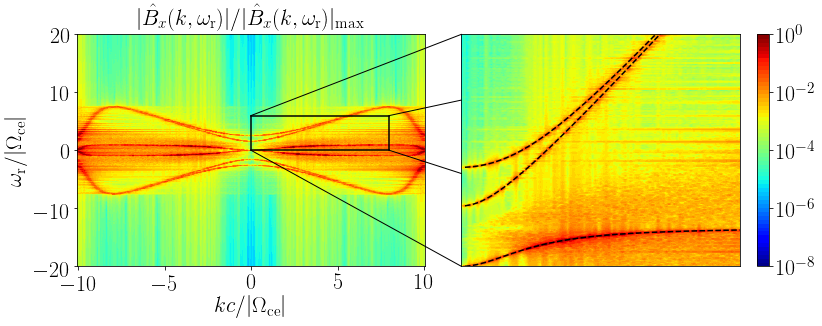

In [3]:
fontsize = 22
plt.rc('text', usetex = True)
plt.rc('font', family = 'serif')
plt.rcParams.update({'font.size': fontsize})
plt.rc('xtick', labelsize = fontsize)
plt.rc('ytick', labelsize = fontsize)


#... compute 2d FFT of Bx
Bxkw = np.fft.fft2(Bx)
K, W = np.meshgrid(ks, w)
Bkw = np.fft.fftshift(Bxkw)
Bkw_plot = np.abs(Bkw)
# ...


f2 = plt.figure()
f2.set_figheight(5)
f2.set_figwidth(12)

ax1 = plt.subplot(121)


ticks = np.power(10, np.linspace(-8, 0, 5))
lvls = np.logspace(-8, 0, 60)
plt.contourf(K, W, Bkw_plot/Bkw_plot.max(), cmap = 'jet', norm = LogNorm(), levels = lvls)
plt.plot(np.linspace(0, 8, 10), np.zeros(10), 'k')
plt.plot(np.linspace(0, 8, 10), np.ones(10)*6, 'k')
plt.plot(np.zeros(10), np.linspace(0, 6, 10), 'k')
plt.plot(np.ones(10)*8, np.linspace(0, 6, 10), 'k')
#plt.xlim((0, 6))
plt.ylim((-20, 20))
plt.xlabel(r'$kc/ |\Omega_\mathrm{ce}|$')
plt.ylabel(r'$\omega_\mathrm{r}/ |\Omega_\mathrm{ce}|$')
#plt.colorbar(ticks = ticks)
plt.title(r'$|\hat{B}_x(k,\omega_\mathrm{r})|/|\hat{B}_x(k,\omega_\mathrm{r})|_\mathrm{max}$', fontsize = fontsize)
#plt.savefig('/home/florian/Schreibtisch/Masterarbeit/05_Präsentationen/03_Ringberg/result1.png', bbox_inches = 'tight')

ax2 = plt.subplot(122)




# ... analytical dispersion relation
k1 = np.linspace(0.1, 8.0, 40)

w1_1 = np.zeros(40)
w1_2 = np.zeros(40)
w1_3 = np.zeros(40)

w1_1[0] = 0.0001 
w1_2[0] = 1.5001 
w1_3[0] = 2.5001


for i in range(0, 40):
    
    if i == 0:
        w1_1[i] = utils.solveDispersionCold(k1[i], +1, c, wce, wpe, w1_1[i], 1e-6, 100)[0]
        w1_2[i] = utils.solveDispersionCold(k1[i], -1, c, wce, wpe, w1_2[i], 1e-6, 100)[0]
        w1_3[i] = utils.solveDispersionCold(k1[i], +1, c, wce, wpe, w1_3[i], 1e-6, 100)[0]
    
    else:
        w1_1[i] = utils.solveDispersionCold(k1[i], +1, c, wce, wpe, w1_1[i-1], 1e-6, 100)[0]
        w1_2[i] = utils.solveDispersionCold(k1[i], -1, c, wce, wpe, w1_2[i-1], 1e-6, 100)[0]
        w1_3[i] = utils.solveDispersionCold(k1[i], +1, c, wce, wpe, w1_3[i-1], 1e-6, 100)[0]
# ...    

    

ticks = np.power(10, np.linspace(-8, 0, 5))
lvls = np.logspace(-8, 0, 60)
plt.contourf(K, W, Bkw_plot/Bkw_plot.max(), cmap = 'jet', norm = LogNorm(), levels = lvls)
plt.xlim((0, 8))
plt.ylim((0, 6))
#plt.xlabel(r'$kc/ |\Omega_\mathrm{ce}|$')
#plt.ylabel(r'$\omega_\mathrm{r}/ |\Omega_\mathrm{ce}|$')
plt.colorbar(ticks = ticks)
#plt.title(r'$|\hat{B}_x(k,\omega_\mathrm{r})|/|\hat{B}_x(k,\omega_\mathrm{r})|_\mathrm{max}$')
plt.xticks([], [])
plt.yticks([], [])
plt.plot(k1, w1_1, 'k--')
plt.plot(k1, w1_2, 'k--')
plt.plot(k1, w1_3, 'k--')
plt.subplots_adjust(hspace = 0.3)
plt.tight_layout()




con1 = ConnectionPatch(xyA = (0, 6), xyB = (0, 6), coordsA = "data", coordsB = "data", axesA = ax2, axesB = ax1, color = "black", linewidth = 1)
con2 = ConnectionPatch(xyA = (0, 0), xyB = (0, 0), coordsA = "data", coordsB = "data", axesA = ax2, axesB = ax1, color = "black", linewidth = 1)
con3 = ConnectionPatch(xyA = (0, 4.3), xyB = (8, 6), coordsA = "data", coordsB = "data", axesA = ax2, axesB = ax1, color = "black", linewidth = 1)
con4 = ConnectionPatch(xyA = (0, 2.4), xyB = (8, 0), coordsA = "data", coordsB = "data", axesA = ax2, axesB = ax1, color = "black", linewidth = 1)

ax2.add_artist(con1)
ax2.add_artist(con2)
ax2.add_artist(con3)
ax2.add_artist(con4)

#plt.savefig('/home/florian/Schreibtisch/Masterarbeit/07_Ausarbeitung/master-thesis/01_Figures/Verification_1.png', bbox_inches = 'tight')

## 1. 3 $N_\mathrm{el}=512$, $p=1$, $N_\mathrm{p}=1\cdot10^5$

In [2]:
data = np.loadtxt('data_wpe=2_wpar=0.1_wperp_0.1_nuh=0.002_L=80_Nel=512_T=300_dt=0.05_p=1_Np=1e5_CVoff.txt')


# ... get parameters
pa = data[0]
T = pa[18]
dt = pa[19]
Nz = int(pa[17])
Lz = pa[16]

c = 1
wce = -1
wpe = 2
p = 1

s = 6
dz = Lz/Nz
zj = np.linspace(0, Lz, Nz + 1)
# ...


# ... get data
uj = data[1:, 0:s*Nz]
bx = uj[:, 2::s]
# ...


# ... compute Bx on a space-time-grid and create w and k vectors
Nt = int(T/dt)
w = np.linspace(0, Nt, Nt + 1) - Nt/2
w = 2*np.pi/T*w

ks = np.linspace(0, Nz, Nz + 1) - Nz/2
ks = 2*np.pi/Lz*ks

Bx = np.zeros((Nt + 1, Nz + 1))
bsp, N, quad_points, weights = utils.createBasis(Lz, Nz, p)

for i in range(0, Nt + 1):
    if i%1000 == 0:
        print(i)
    Bx[i] = utils.evaluation(bx[i], bsp, zj, zj)
# ...

0
1000
2000
3000
4000
5000
6000


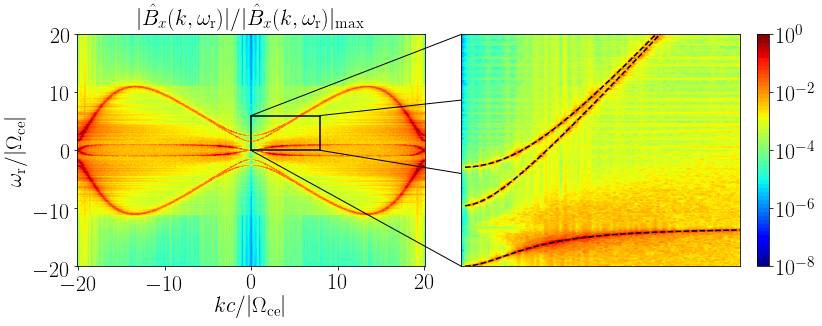

In [6]:
fontsize = 22
plt.rc('text', usetex = True)
plt.rc('font', family = 'serif')
plt.rcParams.update({'font.size': fontsize})
plt.rc('xtick', labelsize = fontsize)
plt.rc('ytick', labelsize = fontsize)


#... compute 2d FFT of Bx
Bxkw = np.fft.fft2(Bx)
K, W = np.meshgrid(ks, w)
Bkw = np.fft.fftshift(Bxkw)
Bkw_plot = np.abs(Bkw)
# ...


f3 = plt.figure()
f3.set_figheight(5)
f3.set_figwidth(12)

ax1 = plt.subplot(121)


ticks = np.power(10, np.linspace(-8, 0, 5))
lvls = np.logspace(-8, 0, 60)
plt.contourf(K, W, Bkw_plot/Bkw_plot.max(), cmap = 'jet', norm = LogNorm(), levels = lvls)
plt.plot(np.linspace(0, 8, 10), np.zeros(10), 'k')
plt.plot(np.linspace(0, 8, 10), np.ones(10)*6, 'k')
plt.plot(np.zeros(10), np.linspace(0, 6, 10), 'k')
plt.plot(np.ones(10)*8, np.linspace(0, 6, 10), 'k')
#plt.xlim((0, 6))
plt.ylim((-20, 20))
plt.xlabel(r'$kc/ |\Omega_\mathrm{ce}|$')
plt.ylabel(r'$\omega_\mathrm{r}/ |\Omega_\mathrm{ce}|$')
#plt.colorbar(ticks = ticks)
plt.title(r'$|\hat{B}_x(k,\omega_\mathrm{r})|/|\hat{B}_x(k,\omega_\mathrm{r})|_\mathrm{max}$', fontsize = fontsize)
#plt.savefig('/home/florian/Schreibtisch/Masterarbeit/05_Präsentationen/03_Ringberg/result1.png', bbox_inches = 'tight')

ax2 = plt.subplot(122)




# ... analytical dispersion relation
k1 = np.linspace(0.1, 8.0, 40)

w1_1 = np.zeros(40)
w1_2 = np.zeros(40)
w1_3 = np.zeros(40)

w1_1[0] = 0.0001 
w1_2[0] = 1.5001 
w1_3[0] = 2.5001


for i in range(0, 40):
    
    if i == 0:
        w1_1[i] = utils.solveDispersionCold(k1[i], +1, c, wce, wpe, w1_1[i], 1e-6, 100)[0]
        w1_2[i] = utils.solveDispersionCold(k1[i], -1, c, wce, wpe, w1_2[i], 1e-6, 100)[0]
        w1_3[i] = utils.solveDispersionCold(k1[i], +1, c, wce, wpe, w1_3[i], 1e-6, 100)[0]
    
    else:
        w1_1[i] = utils.solveDispersionCold(k1[i], +1, c, wce, wpe, w1_1[i-1], 1e-6, 100)[0]
        w1_2[i] = utils.solveDispersionCold(k1[i], -1, c, wce, wpe, w1_2[i-1], 1e-6, 100)[0]
        w1_3[i] = utils.solveDispersionCold(k1[i], +1, c, wce, wpe, w1_3[i-1], 1e-6, 100)[0]
# ...    

    

ticks = np.power(10, np.linspace(-8, 0, 5))
lvls = np.logspace(-8, 0, 60)
plt.contourf(K, W, Bkw_plot/Bkw_plot.max(), cmap = 'jet', norm = LogNorm(), levels = lvls)
plt.xlim((0, 8))
plt.ylim((0, 6))
#plt.xlabel(r'$kc/ |\Omega_\mathrm{ce}|$')
#plt.ylabel(r'$\omega_\mathrm{r}/ |\Omega_\mathrm{ce}|$')
plt.colorbar(ticks = ticks)
#plt.title(r'$|\hat{B}_x(k,\omega_\mathrm{r})|/|\hat{B}_x(k,\omega_\mathrm{r})|_\mathrm{max}$')
plt.xticks([], [])
plt.yticks([], [])
plt.plot(k1, w1_1, 'k--')
plt.plot(k1, w1_2, 'k--')
plt.plot(k1, w1_3, 'k--')
plt.subplots_adjust(hspace = 0.3)
plt.tight_layout()




con1 = ConnectionPatch(xyA = (0, 6), xyB = (0, 6), coordsA = "data", coordsB = "data", axesA = ax2, axesB = ax1, color = "black", linewidth = 1)
con2 = ConnectionPatch(xyA = (0, 0), xyB = (0, 0), coordsA = "data", coordsB = "data", axesA = ax2, axesB = ax1, color = "black", linewidth = 1)
con3 = ConnectionPatch(xyA = (0, 4.3), xyB = (8, 6), coordsA = "data", coordsB = "data", axesA = ax2, axesB = ax1, color = "black", linewidth = 1)
con4 = ConnectionPatch(xyA = (0, 2.4), xyB = (8, 0), coordsA = "data", coordsB = "data", axesA = ax2, axesB = ax1, color = "black", linewidth = 1)

ax2.add_artist(con1)
ax2.add_artist(con2)
ax2.add_artist(con3)
ax2.add_artist(con4)

#plt.savefig('/home/florian/Schreibtisch/Masterarbeit/07_Ausarbeitung/master-thesis/01_Figures/Verification_1.png', bbox_inches = 'tight')

## 1. 4 $N_\mathrm{el}=512$, $p=1$, $N_\mathrm{p}=2\cdot10^5$

In [3]:
data = np.loadtxt('data_wpe=2_wpar=0.1_wperp_0.1_nuh=0.002_L=80_Nel=512_T=300_dt=0.05_p=1_Np=2e5_CVoff.txt')


# ... get parameters
pa = data[0]
T = pa[18]
dt = pa[19]
Nz = int(pa[17])
Lz = pa[16]

c = 1
wce = -1
wpe = 2
p = 1

s = 6
dz = Lz/Nz
zj = np.linspace(0, Lz, Nz + 1)
# ...


# ... get data
uj = data[1:, 0:s*Nz]
bx = uj[:, 2::s]
# ...


# ... compute Bx on a space-time-grid and create w and k vectors
Nt = int(T/dt)
w = np.linspace(0, Nt, Nt + 1) - Nt/2
w = 2*np.pi/T*w

ks = np.linspace(0, Nz, Nz + 1) - Nz/2
ks = 2*np.pi/Lz*ks

Bx = np.zeros((Nt + 1, Nz + 1))
bsp, N, quad_points, weights = utils.createBasis(Lz, Nz, p)

for i in range(0, Nt + 1):
    if i%1000 == 0:
        print(i)
    Bx[i] = utils.evaluation(bx[i], bsp, zj, zj)
# ...

0
1000
2000
3000
4000
5000
6000


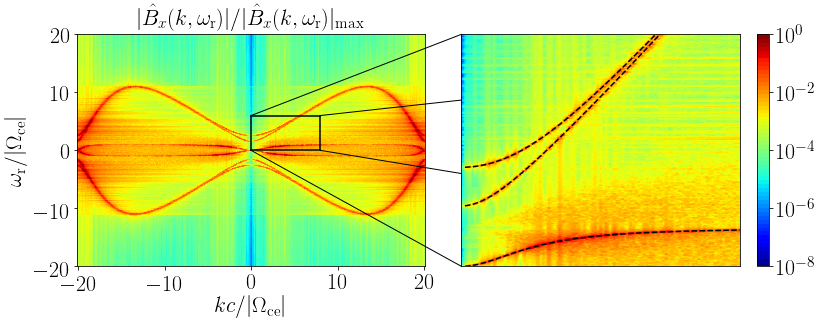

In [4]:
fontsize = 22
plt.rc('text', usetex = True)
plt.rc('font', family = 'serif')
plt.rcParams.update({'font.size': fontsize})
plt.rc('xtick', labelsize = fontsize)
plt.rc('ytick', labelsize = fontsize)


#... compute 2d FFT of Bx
Bxkw = np.fft.fft2(Bx)
K, W = np.meshgrid(ks, w)
Bkw = np.fft.fftshift(Bxkw)
Bkw_plot = np.abs(Bkw)
# ...


f4 = plt.figure()
f4.set_figheight(5)
f4.set_figwidth(12)

ax1 = plt.subplot(121)


ticks = np.power(10, np.linspace(-8, 0, 5))
lvls = np.logspace(-8, 0, 60)
plt.contourf(K, W, Bkw_plot/Bkw_plot.max(), cmap = 'jet', norm = LogNorm(), levels = lvls)
plt.plot(np.linspace(0, 8, 10), np.zeros(10), 'k')
plt.plot(np.linspace(0, 8, 10), np.ones(10)*6, 'k')
plt.plot(np.zeros(10), np.linspace(0, 6, 10), 'k')
plt.plot(np.ones(10)*8, np.linspace(0, 6, 10), 'k')
#plt.xlim((0, 6))
plt.ylim((-20, 20))
plt.xlabel(r'$kc/ |\Omega_\mathrm{ce}|$')
plt.ylabel(r'$\omega_\mathrm{r}/ |\Omega_\mathrm{ce}|$')
#plt.colorbar(ticks = ticks)
plt.title(r'$|\hat{B}_x(k,\omega_\mathrm{r})|/|\hat{B}_x(k,\omega_\mathrm{r})|_\mathrm{max}$', fontsize = fontsize)
#plt.savefig('/home/florian/Schreibtisch/Masterarbeit/05_Präsentationen/03_Ringberg/result1.png', bbox_inches = 'tight')

ax2 = plt.subplot(122)




# ... analytical dispersion relation
k1 = np.linspace(0.1, 8.0, 40)

w1_1 = np.zeros(40)
w1_2 = np.zeros(40)
w1_3 = np.zeros(40)

w1_1[0] = 0.0001 
w1_2[0] = 1.5001 
w1_3[0] = 2.5001


for i in range(0, 40):
    
    if i == 0:
        w1_1[i] = utils.solveDispersionCold(k1[i], +1, c, wce, wpe, w1_1[i], 1e-6, 100)[0]
        w1_2[i] = utils.solveDispersionCold(k1[i], -1, c, wce, wpe, w1_2[i], 1e-6, 100)[0]
        w1_3[i] = utils.solveDispersionCold(k1[i], +1, c, wce, wpe, w1_3[i], 1e-6, 100)[0]
    
    else:
        w1_1[i] = utils.solveDispersionCold(k1[i], +1, c, wce, wpe, w1_1[i-1], 1e-6, 100)[0]
        w1_2[i] = utils.solveDispersionCold(k1[i], -1, c, wce, wpe, w1_2[i-1], 1e-6, 100)[0]
        w1_3[i] = utils.solveDispersionCold(k1[i], +1, c, wce, wpe, w1_3[i-1], 1e-6, 100)[0]
# ...    

    

ticks = np.power(10, np.linspace(-8, 0, 5))
lvls = np.logspace(-8, 0, 60)
plt.contourf(K, W, Bkw_plot/Bkw_plot.max(), cmap = 'jet', norm = LogNorm(), levels = lvls)
plt.xlim((0, 8))
plt.ylim((0, 6))
#plt.xlabel(r'$kc/ |\Omega_\mathrm{ce}|$')
#plt.ylabel(r'$\omega_\mathrm{r}/ |\Omega_\mathrm{ce}|$')
plt.colorbar(ticks = ticks)
#plt.title(r'$|\hat{B}_x(k,\omega_\mathrm{r})|/|\hat{B}_x(k,\omega_\mathrm{r})|_\mathrm{max}$')
plt.xticks([], [])
plt.yticks([], [])
plt.plot(k1, w1_1, 'k--')
plt.plot(k1, w1_2, 'k--')
plt.plot(k1, w1_3, 'k--')
plt.subplots_adjust(hspace = 0.3)
plt.tight_layout()




con1 = ConnectionPatch(xyA = (0, 6), xyB = (0, 6), coordsA = "data", coordsB = "data", axesA = ax2, axesB = ax1, color = "black", linewidth = 1)
con2 = ConnectionPatch(xyA = (0, 0), xyB = (0, 0), coordsA = "data", coordsB = "data", axesA = ax2, axesB = ax1, color = "black", linewidth = 1)
con3 = ConnectionPatch(xyA = (0, 4.3), xyB = (8, 6), coordsA = "data", coordsB = "data", axesA = ax2, axesB = ax1, color = "black", linewidth = 1)
con4 = ConnectionPatch(xyA = (0, 2.4), xyB = (8, 0), coordsA = "data", coordsB = "data", axesA = ax2, axesB = ax1, color = "black", linewidth = 1)

ax2.add_artist(con1)
ax2.add_artist(con2)
ax2.add_artist(con3)
ax2.add_artist(con4)

#plt.savefig('/home/florian/Schreibtisch/Masterarbeit/07_Ausarbeitung/master-thesis/01_Figures/Verification_1.png', bbox_inches = 'tight')

# 2. GEMPIC

## 2. 1 $N_\mathrm{el}=256$, $p=1$, $N_\mathrm{p}=1\cdot10^5$

In [3]:
data = np.loadtxt('data_wpe=2_wpar=0.1_wperp_0.1_nuh=0.002_L=80_Nel=256_T=300_dt=0.05_p=1_Np=1e5_CVoff_Strang_GEMPIC.txt')


# ... get parameters
T = 300
dt = 0.05
Nz = 256
Lz = 80

c = 1
wce = -1
wpe = 2
p = 1

s = 6
dz = Lz/Nz
zj = np.linspace(0, Lz, Nz + 1)
# ...


# ... get data
Bx = data[:, 0:Nz + 1]
en_E = data[:, Nz + 1]
en_B = data[:, Nz + 2]
en_C = data[:, Nz + 3]
en_H = data[:, Nz + 4]
# ...


# ... create w and k vectors
Nt = int(T/dt)
w = np.linspace(0, Nt, Nt + 1) - Nt/2
w = 2*np.pi/T*w

ks = np.linspace(0, Nz, Nz + 1) - Nz/2
ks = 2*np.pi/Lz*ks
# ...

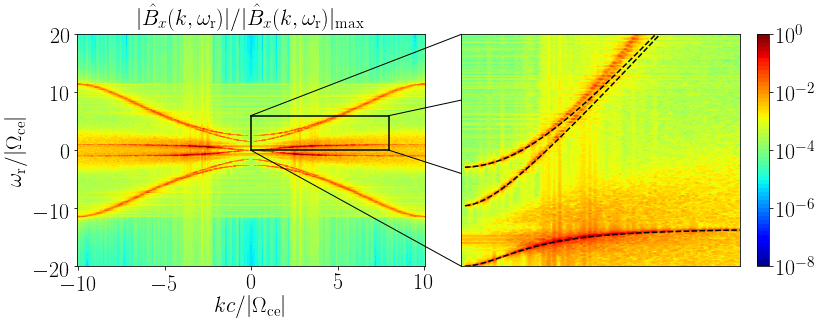

In [7]:
fontsize = 22
plt.rc('text', usetex = True)
plt.rc('font', family = 'serif')
plt.rcParams.update({'font.size': fontsize})
plt.rc('xtick', labelsize = fontsize)
plt.rc('ytick', labelsize = fontsize)


#... compute 2d FFT of Bx
Bxkw = np.fft.fft2(Bx)
K, W = np.meshgrid(ks, w)
Bkw = np.fft.fftshift(Bxkw)
Bkw_plot = np.abs(Bkw)
# ...


f5 = plt.figure()
f5.set_figheight(5)
f5.set_figwidth(12)

ax1 = plt.subplot(121)


ticks = np.power(10, np.linspace(-8, 0, 5))
lvls = np.logspace(-8, 0, 60)
plt.contourf(K, W, Bkw_plot/Bkw_plot.max(), cmap = 'jet', norm = LogNorm(), levels = lvls)
plt.plot(np.linspace(0, 8, 10), np.zeros(10), 'k')
plt.plot(np.linspace(0, 8, 10), np.ones(10)*6, 'k')
plt.plot(np.zeros(10), np.linspace(0, 6, 10), 'k')
plt.plot(np.ones(10)*8, np.linspace(0, 6, 10), 'k')
#plt.xlim((0, 6))
plt.ylim((-20, 20))
plt.xlabel(r'$kc/ |\Omega_\mathrm{ce}|$')
plt.ylabel(r'$\omega_\mathrm{r}/ |\Omega_\mathrm{ce}|$')
#plt.colorbar(ticks = ticks)
plt.title(r'$|\hat{B}_x(k,\omega_\mathrm{r})|/|\hat{B}_x(k,\omega_\mathrm{r})|_\mathrm{max}$', fontsize = fontsize)
#plt.savefig('/home/florian/Schreibtisch/Masterarbeit/05_Präsentationen/03_Ringberg/result1.png', bbox_inches = 'tight')

ax2 = plt.subplot(122)




# ... analytical dispersion relation
k1 = np.linspace(0.1, 8.0, 40)

w1_1 = np.zeros(40)
w1_2 = np.zeros(40)
w1_3 = np.zeros(40)

w1_1[0] = 0.0001 
w1_2[0] = 1.5001 
w1_3[0] = 2.5001


for i in range(0, 40):
    
    if i == 0:
        w1_1[i] = utils.solveDispersionCold(k1[i], +1, c, wce, wpe, w1_1[i], 1e-6, 100)[0]
        w1_2[i] = utils.solveDispersionCold(k1[i], -1, c, wce, wpe, w1_2[i], 1e-6, 100)[0]
        w1_3[i] = utils.solveDispersionCold(k1[i], +1, c, wce, wpe, w1_3[i], 1e-6, 100)[0]
    
    else:
        w1_1[i] = utils.solveDispersionCold(k1[i], +1, c, wce, wpe, w1_1[i-1], 1e-6, 100)[0]
        w1_2[i] = utils.solveDispersionCold(k1[i], -1, c, wce, wpe, w1_2[i-1], 1e-6, 100)[0]
        w1_3[i] = utils.solveDispersionCold(k1[i], +1, c, wce, wpe, w1_3[i-1], 1e-6, 100)[0]
# ...    

    

ticks = np.power(10, np.linspace(-8, 0, 5))
lvls = np.logspace(-8, 0, 60)
plt.contourf(K, W, Bkw_plot/Bkw_plot.max(), cmap = 'jet', norm = LogNorm(), levels = lvls)
plt.xlim((0, 8))
plt.ylim((0, 6))
#plt.xlabel(r'$kc/ |\Omega_\mathrm{ce}|$')
#plt.ylabel(r'$\omega_\mathrm{r}/ |\Omega_\mathrm{ce}|$')
plt.colorbar(ticks = ticks)
#plt.title(r'$|\hat{B}_x(k,\omega_\mathrm{r})|/|\hat{B}_x(k,\omega_\mathrm{r})|_\mathrm{max}$')
plt.xticks([], [])
plt.yticks([], [])
plt.plot(k1, w1_1, 'k--')
plt.plot(k1, w1_2, 'k--')
plt.plot(k1, w1_3, 'k--')
plt.subplots_adjust(hspace = 0.3)
plt.tight_layout()




con1 = ConnectionPatch(xyA = (0, 6), xyB = (0, 6), coordsA = "data", coordsB = "data", axesA = ax2, axesB = ax1, color = "black", linewidth = 1)
con2 = ConnectionPatch(xyA = (0, 0), xyB = (0, 0), coordsA = "data", coordsB = "data", axesA = ax2, axesB = ax1, color = "black", linewidth = 1)
con3 = ConnectionPatch(xyA = (0, 4.3), xyB = (8, 6), coordsA = "data", coordsB = "data", axesA = ax2, axesB = ax1, color = "black", linewidth = 1)
con4 = ConnectionPatch(xyA = (0, 2.4), xyB = (8, 0), coordsA = "data", coordsB = "data", axesA = ax2, axesB = ax1, color = "black", linewidth = 1)

ax2.add_artist(con1)
ax2.add_artist(con2)
ax2.add_artist(con3)
ax2.add_artist(con4)

#plt.savefig('/home/florian/Schreibtisch/Masterarbeit/07_Ausarbeitung/master-thesis/01_Figures/Verification_1.png', bbox_inches = 'tight')

## 2. 2 $N_\mathrm{el}=512$, $p=1$, $N_\mathrm{p}=1\cdot10^5$

In [3]:
data_GEMPIC = np.loadtxt('data_wpe=2_wpar=0.1_wperp_0.1_nuh=0.002_L=80_Nel=512_T=300_dt=0.05_p=1_Np=1e5_CVoff_Strang_GEMPIC.txt')


# ... get parameters
T = 300
dt = 0.05
Nz = 512
Lz = 80

c = 1
wce = -1
wpe = 2
p = 1

s = 6
dz = Lz/Nz
zj = np.linspace(0, Lz, Nz + 1)
# ...


# ... get data
Bx_GEMPIC = data_GEMPIC[:, 0:Nz + 1]
en_E_GEMPIC = data_GEMPIC[:, Nz + 1]
en_B_GEMPIC = data_GEMPIC[:, Nz + 2]
en_C_GEMPIC = data_GEMPIC[:, Nz + 3]
en_H_GEMPIC = data_GEMPIC[:, Nz + 4]
# ...


# ... create w and k vectors
Nt = int(T/dt)
w = np.linspace(0, Nt, Nt + 1) - Nt/2
w = 2*np.pi/T*w

ks = np.linspace(0, Nz, Nz + 1) - Nz/2
ks = 2*np.pi/Lz*ks
# ...

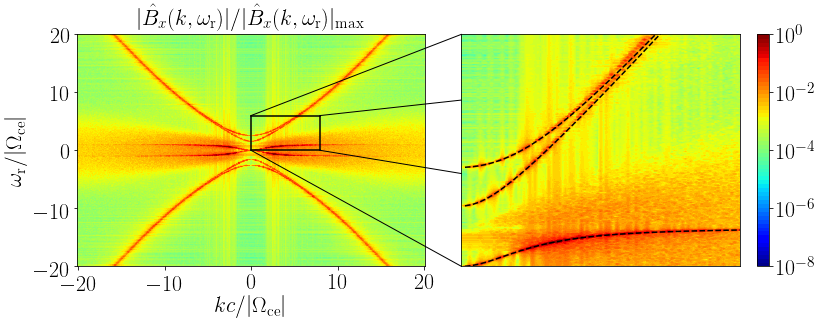

In [5]:
fontsize = 22
plt.rc('text', usetex = True)
plt.rc('font', family = 'serif')
plt.rcParams.update({'font.size': fontsize})
plt.rc('xtick', labelsize = fontsize)
plt.rc('ytick', labelsize = fontsize)


#... compute 2d FFT of Bx
Bxkw_GEMPIC = np.fft.fft2(Bx_GEMPIC)
K, W = np.meshgrid(ks, w)
Bkw_GEMPIC = np.fft.fftshift(Bxkw_GEMPIC)
Bkw_plot_GEMPIC = np.abs(Bkw_GEMPIC)
# ...


f6 = plt.figure()
f6.set_figheight(5)
f6.set_figwidth(12)

ax1 = plt.subplot(121)


ticks = np.power(10, np.linspace(-8, 0, 5))
lvls = np.logspace(-8, 0, 60)
plt.contourf(K, W, Bkw_plot_GEMPIC/Bkw_plot_GEMPIC.max(), cmap = 'jet', norm = LogNorm(), levels = lvls)
plt.plot(np.linspace(0, 8, 10), np.zeros(10), 'k')
plt.plot(np.linspace(0, 8, 10), np.ones(10)*6, 'k')
plt.plot(np.zeros(10), np.linspace(0, 6, 10), 'k')
plt.plot(np.ones(10)*8, np.linspace(0, 6, 10), 'k')
#plt.xlim((0, 6))
plt.ylim((-20, 20))
plt.xlabel(r'$kc/ |\Omega_\mathrm{ce}|$')
plt.ylabel(r'$\omega_\mathrm{r}/ |\Omega_\mathrm{ce}|$')
#plt.colorbar(ticks = ticks)
plt.title(r'$|\hat{B}_x(k,\omega_\mathrm{r})|/|\hat{B}_x(k,\omega_\mathrm{r})|_\mathrm{max}$', fontsize = fontsize)
#plt.savefig('/home/florian/Schreibtisch/Masterarbeit/05_Präsentationen/03_Ringberg/result1.png', bbox_inches = 'tight')

ax2 = plt.subplot(122)




# ... analytical dispersion relation
k1 = np.linspace(0.1, 8.0, 40)

w1_1 = np.zeros(40)
w1_2 = np.zeros(40)
w1_3 = np.zeros(40)

w1_1[0] = 0.0001 
w1_2[0] = 1.5001 
w1_3[0] = 2.5001


for i in range(0, 40):
    
    if i == 0:
        w1_1[i] = utils.solveDispersionCold(k1[i], +1, c, wce, wpe, w1_1[i], 1e-6, 100)[0]
        w1_2[i] = utils.solveDispersionCold(k1[i], -1, c, wce, wpe, w1_2[i], 1e-6, 100)[0]
        w1_3[i] = utils.solveDispersionCold(k1[i], +1, c, wce, wpe, w1_3[i], 1e-6, 100)[0]
    
    else:
        w1_1[i] = utils.solveDispersionCold(k1[i], +1, c, wce, wpe, w1_1[i-1], 1e-6, 100)[0]
        w1_2[i] = utils.solveDispersionCold(k1[i], -1, c, wce, wpe, w1_2[i-1], 1e-6, 100)[0]
        w1_3[i] = utils.solveDispersionCold(k1[i], +1, c, wce, wpe, w1_3[i-1], 1e-6, 100)[0]
# ...    

    

ticks = np.power(10, np.linspace(-8, 0, 5))
lvls = np.logspace(-8, 0, 60)
plt.contourf(K, W, Bkw_plot_GEMPIC/Bkw_plot_GEMPIC.max(), cmap = 'jet', norm = LogNorm(), levels = lvls)
plt.xlim((0, 8))
plt.ylim((0, 6))
#plt.xlabel(r'$kc/ |\Omega_\mathrm{ce}|$')
#plt.ylabel(r'$\omega_\mathrm{r}/ |\Omega_\mathrm{ce}|$')
plt.colorbar(ticks = ticks)
#plt.title(r'$|\hat{B}_x(k,\omega_\mathrm{r})|/|\hat{B}_x(k,\omega_\mathrm{r})|_\mathrm{max}$')
plt.xticks([], [])
plt.yticks([], [])
plt.plot(k1, w1_1, 'k--')
plt.plot(k1, w1_2, 'k--')
plt.plot(k1, w1_3, 'k--')
plt.subplots_adjust(hspace = 0.3)
plt.tight_layout()




con1 = ConnectionPatch(xyA = (0, 6), xyB = (0, 6), coordsA = "data", coordsB = "data", axesA = ax2, axesB = ax1, color = "black", linewidth = 1)
con2 = ConnectionPatch(xyA = (0, 0), xyB = (0, 0), coordsA = "data", coordsB = "data", axesA = ax2, axesB = ax1, color = "black", linewidth = 1)
con3 = ConnectionPatch(xyA = (0, 4.3), xyB = (8, 6), coordsA = "data", coordsB = "data", axesA = ax2, axesB = ax1, color = "black", linewidth = 1)
con4 = ConnectionPatch(xyA = (0, 2.4), xyB = (8, 0), coordsA = "data", coordsB = "data", axesA = ax2, axesB = ax1, color = "black", linewidth = 1)

ax2.add_artist(con1)
ax2.add_artist(con2)
ax2.add_artist(con3)
ax2.add_artist(con4)

#plt.savefig('/home/florian/Schreibtisch/Masterarbeit/07_Ausarbeitung/master-thesis/01_Figures/Verification_1.png', bbox_inches = 'tight')

# 3. Comparison

In [4]:
#... compute 2d FFT of Bx (Standard)
Bxkw = np.fft.fft2(Bx)
K, W = np.meshgrid(ks, w)
Bkw = np.fft.fftshift(Bxkw)
Bkw_plot = np.abs(Bkw)
# ...

#... compute 2d FFT of Bx (GEMPIC)
Bxkw_GEMPIC = np.fft.fft2(Bx_GEMPIC)
K, W = np.meshgrid(ks, w)
Bkw_GEMPIC = np.fft.fftshift(Bxkw_GEMPIC)
Bkw_plot_GEMPIC = np.abs(Bkw_GEMPIC)
# ...

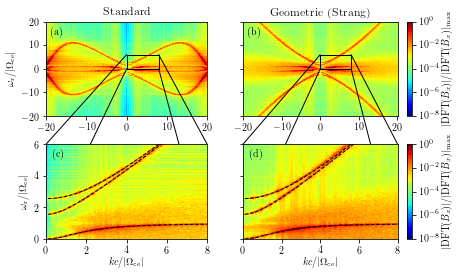

In [6]:
from matplotlib import gridspec

plt.rc('text', usetex = True)
plt.rc('font', family = 'serif')

fn, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, gridspec_kw={'width_ratios':[1, 1.2]})
fn.set_figheight(4)
fn.set_figwidth(7)



ticks = np.power(10, np.linspace(-8, 0, 5))
lvls = np.logspace(-8, 0, 60)
cont1 = ax1.contourf(K[2000:4000:2, :], W[2000:4000:2, :], Bkw_plot[2000:4000:2, :]/Bkw_plot.max(), cmap = 'jet', norm = LogNorm(), levels = lvls, zorder = -20)
ax1.set_rasterization_zorder(-10)
ax1.plot(np.linspace(0, 8, 10), np.zeros(10), 'k', linewidth = 1.0)
ax1.plot(np.linspace(0, 8, 10), np.ones(10)*6, 'k', linewidth = 1.0)
ax1.plot(np.zeros(10), np.linspace(0, 6, 10), 'k', linewidth = 1.0)
ax1.plot(np.ones(10)*8, np.linspace(0, 6, 10), 'k', linewidth = 1.0)
ax1.set_ylim((-20, 20))
#ax1.set_xlabel(r'$kc/ |\Omega_\mathrm{ce}|$')
ax1.set_ylabel(r'$\omega_\mathrm{r}/ |\Omega_\mathrm{ce}|$')
ax1.set_title('Standard')
#plt.colorbar(mappable=cont1, ticks=ticks, label=r'$|\mathrm{DFT}(B_x)|/|\mathrm{DFT}(B_x)|_\mathrm{max}$')
#plt.colorbar(mappable=cont1, ticks=ticks)
ax1.text(-19, 14.5, '(a)')


ticks = np.power(10, np.linspace(-8, 0, 5))
lvls = np.logspace(-8, 0, 60)
cont2 = ax2.contourf(K[2000:4000:2, :], W[2000:4000:2, :], Bkw_plot_GEMPIC[2000:4000:2, :]/Bkw_plot_GEMPIC.max(), cmap = 'jet', norm = LogNorm(), levels = lvls, zorder = -20)
ax2.set_rasterization_zorder(-10)
ax2.plot(np.linspace(0, 8, 10), np.zeros(10), 'k', linewidth = 1.0)
ax2.plot(np.linspace(0, 8, 10), np.ones(10)*6, 'k', linewidth = 1.0)
ax2.plot(np.zeros(10), np.linspace(0, 6, 10), 'k', linewidth = 1.0)
ax2.plot(np.ones(10)*8, np.linspace(0, 6, 10), 'k', linewidth = 1.0)
ax2.set_ylim((-20, 20))
#ax2.set_xlabel(r'$kc/ |\Omega_\mathrm{ce}|$')
#ax2.set_ylabel(r'$\omega_\mathrm{r}/ |\Omega_\mathrm{ce}|$')
ax2.set_title('Geometric (Strang)')
plt.colorbar(mappable=cont2, ax=ax2, ticks=ticks, label=r'$|\mathrm{DFT}(B_x)|/|\mathrm{DFT}(B_x)|_\mathrm{max}$')
ax2.set_yticklabels([])
ax2.text(-19, 14.5, '(b)')



# ... analytical dispersion relation
k1 = np.linspace(0.1, 8.0, 40)

w1_1 = np.zeros(40)
w1_2 = np.zeros(40)
w1_3 = np.zeros(40)

w1_1[0] = 0.0001 
w1_2[0] = 1.5001 
w1_3[0] = 2.5001


for i in range(0, 40):
    
    if i == 0:
        w1_1[i] = utils.solveDispersionCold(k1[i], +1, c, wce, wpe, w1_1[i], 1e-6, 100)[0]
        w1_2[i] = utils.solveDispersionCold(k1[i], -1, c, wce, wpe, w1_2[i], 1e-6, 100)[0]
        w1_3[i] = utils.solveDispersionCold(k1[i], +1, c, wce, wpe, w1_3[i], 1e-6, 100)[0]
    
    else:
        w1_1[i] = utils.solveDispersionCold(k1[i], +1, c, wce, wpe, w1_1[i-1], 1e-6, 100)[0]
        w1_2[i] = utils.solveDispersionCold(k1[i], -1, c, wce, wpe, w1_2[i-1], 1e-6, 100)[0]
        w1_3[i] = utils.solveDispersionCold(k1[i], +1, c, wce, wpe, w1_3[i-1], 1e-6, 100)[0]
# ...  


ticks = np.power(10, np.linspace(-8, 0, 5))
lvls = np.logspace(-8, 0, 60)
cont3 = ax3.contourf(K[3000:3300, 256:359], W[3000:3300, 256:359], Bkw_plot[3000:3300, 256:359]/Bkw_plot.max(), cmap = 'jet', norm = LogNorm(), levels = lvls, zorder = -20)
ax3.set_rasterization_zorder(-10)
ax3.set_xlim((0, 8))
ax3.set_ylim((0, 6))
ax3.set_xlabel(r'$kc/ |\Omega_\mathrm{ce}|$')
ax3.set_ylabel(r'$\omega_\mathrm{r}/ |\Omega_\mathrm{ce}|$')
#plt.colorbar(mappable=cont3, ticks=ticks, label=r'$|\mathrm{DFT}(B_x)|/|\mathrm{DFT}(B_x)|_\mathrm{max}$')
#plt.colorbar(mappable=cont3, ticks=ticks)
ax3.plot(k1, w1_1, 'k--', linewidth = 1.0)
ax3.plot(k1, w1_2, 'k--', linewidth = 1.0) 
ax3.plot(k1, w1_3, 'k--', linewidth = 1.0)
ax3.text(0.3, 5.2, '(c)')



ticks = np.power(10, np.linspace(-8, 0, 5))
lvls = np.logspace(-8, 0, 60)
cont4 = ax4.contourf(K[3000:3300, 256:359], W[3000:3300, 256:359], Bkw_plot_GEMPIC[3000:3300, 256:359]/Bkw_plot_GEMPIC.max(), cmap = 'jet', norm = LogNorm(), levels = lvls, zorder = -20)
ax4.set_rasterization_zorder(-10)
ax4.set_xlim((0, 8))
ax4.set_ylim((0, 6))
ax4.set_xlabel(r'$kc/ |\Omega_\mathrm{ce}|$')
#ax4.set_ylabel(r'$\omega_\mathrm{r}/ |\Omega_\mathrm{ce}|$')
plt.colorbar(mappable=cont4, ax=ax4, ticks=ticks, label=r'$|\mathrm{DFT}(B_x)|/|\mathrm{DFT}(B_x)|_\mathrm{max}$')
ax4.plot(k1, w1_1, 'k--', linewidth = 1.0)
ax4.plot(k1, w1_2, 'k--', linewidth = 1.0)
ax4.plot(k1, w1_3, 'k--', linewidth = 1.0)
ax4.set_yticklabels([])
ax4.text(0.3, 5.2, '(d)')

fn.subplots_adjust(hspace=0.3)
fn.subplots_adjust(wspace=0.2)







con1 = ConnectionPatch(xyA = (0, 6), xyB = (0, 6), coordsA = "data", coordsB = "data", axesA = ax1, axesB = ax3, color = "black", linewidth = 1)
con2 = ConnectionPatch(xyA = (0, 0), xyB = (2.2, 6), coordsA = "data", coordsB = "data", axesA = ax1, axesB = ax3, color = "black", linewidth = 1)
con3 = ConnectionPatch(xyA = (8, 6), xyB = (8, 6), coordsA = "data", coordsB = "data", axesA = ax1, axesB = ax3, color = "black", linewidth = 1)
con4 = ConnectionPatch(xyA = (8, 0), xyB = (6.6, 6), coordsA = "data", coordsB = "data", axesA = ax1, axesB = ax3, color = "black", linewidth = 1)

ax1.add_artist(con1)
ax1.add_artist(con2)
ax1.add_artist(con3)
ax1.add_artist(con4)


con1 = ConnectionPatch(xyA = (0, 6), xyB = (0, 6), coordsA = "data", coordsB = "data", axesA = ax2, axesB = ax4, color = "black", linewidth = 1)
con2 = ConnectionPatch(xyA = (0, 0), xyB = (2.2, 6), coordsA = "data", coordsB = "data", axesA = ax2, axesB = ax4, color = "black", linewidth = 1)
con3 = ConnectionPatch(xyA = (8, 6), xyB = (8, 6), coordsA = "data", coordsB = "data", axesA = ax2, axesB = ax4, color = "black", linewidth = 1)
con4 = ConnectionPatch(xyA = (8, 0), xyB = (6.6, 6), coordsA = "data", coordsB = "data", axesA = ax2, axesB = ax4, color = "black", linewidth = 1)

ax2.add_artist(con1)
ax2.add_artist(con2)
ax2.add_artist(con3)
ax2.add_artist(con4)


plt.savefig('/home/florian/Schreibtisch/PHD/02_Projekte/hylife/papers/01_Comp_FEEC_standard/Spectra_1e5.pdf', bbox_inches = 'tight')